## Importing libraries and data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
GDP2020 = pd.read_excel('GDPCAP.xlsx')
GDPCAP = pd.read_excel ('GDP2020.xlsx')
Bnaires = pd.read_excel('2022_forbes_billionaires.xlsx')

## Cleaning the data


Cleaning GDP2020 Per Capita data 

1. Overview
2. Drop columns .drop("column_name", axis = 1, inplace = True)
3. Renaming columns by creating a new list and assigning to the columns
4. Dropping rows where there's no information on GDP dropna( subset = ["column_name"], inplace = True )


In [4]:
GDPCAP.head()

,Country Name,Country Code,2020
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,1359.618224
2,Afghanistan,AFG,516.747871
3,Africa Western and Central,AFW,1710.073363
4,Angola,AGO,1776.166868


In [5]:
GDPCAP.drop("Country Code", axis = 1 , inplace = True)
columns_rename = ['CountryName','2020GDP']
GDPCAP.columns = columns_rename 
GDPCAP.dropna(subset = ['2020GDP'], inplace = True )

GDP 2020 table clean
1. removing null rows for GDP 
2. reformatting GDP

In [6]:
GDP2020.rename(columns = {"GDPPERCAP" : "GDP" }, inplace = True) 
GDP2020.dropna(subset = ["GDP"], inplace = True )

In [7]:
pd.options.display.float_format = '{:.2f}'.format
GDP2020.nlargest(20,'GDP')

,Country,GDP
0,United States,20936600.00
1,China,14722730.70
2,Japan,5064872.88
3,Germany,3806060.14
4,United Kingdom,2707743.78
5,India,2622983.73
6,France,2603004.40
7,Italy,1886445.27
8,Canada,1643407.98
9,"Korea, Rep.",1630525.01


Cleaning Billionare table 
1. dropping unneccessary table 
2. concatenating networth to convert to int

In [8]:
Bnaires.drop("Column1", axis = 1 , inplace = True)

In [9]:
Bnaires["networth"] = Bnaires["networth"].str.replace("B","")
Bnaires["networth"] = Bnaires["networth"].str.replace("$","")
Bnaires["networth"] = Bnaires["networth"].astype(float)




C:\Users\SUNGHE~1.GRO\AppData\Local\Temp/ipykernel_22208/400528084.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Bnaires["networth"] = Bnaires["networth"].str.replace("$","")


In [10]:
Bnaires.head(50)

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.00,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.00,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.00,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.00,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.00,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.00,49,United States,Google,Technology
6,7,Sergey Brin,107.00,48,United States,Google,Technology
7,8,Larry Ellison,106.00,77,United States,software,Technology
8,9,Steve Ballmer,91.40,66,United States,Microsoft,Technology
9,10,Mukesh Ambani,90.70,64,India,diversified,Diversified


In Billionaires record, some of the countries do not match the names listed in GDP data

Finding unmatched country names from Billionaire data to map it on GDP data
1. saving unique country names from each data frame as lists
2. using for loop, append country names (from Billionaire list) that do not exist in GDP data
3. check the data quality & confirm what needs to be fixed for a good quality mapping
4. after mapping recheck the data for both GDP & GDP Per capita country names 


In [11]:
Bnairecountry = Bnaires["country"].unique()
GDPcountry = GDP2020["Country"].unique()

In [12]:
Missingcountry = []
for i in Bnairecountry:
    if i not in GDPcountry: 
        Missingcountry.append(i)
    

In [13]:
Missingcountry

['Hong Kong',
 'Russia',
 'Czechia',
 'Taiwan',
 'South Korea',
 'Egypt',
 'Eswatini (Swaziland)',
 'Venezuela',
 'Guernsey',
 'Macau',
 'Slovakia']

In [14]:
GDP2020.loc[GDP2020["Country"].str.contains("|".join(Missingcountry))]

C:\Users\SUNGHE~1.GRO\AppData\Local\Temp/ipykernel_22208/2057144159.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  GDP2020.loc[GDP2020["Country"].str.contains("|".join(Missingcountry))]


,Country,GDP
10,Russian Federation,1483497.78
30,"Egypt, Arab Rep.",363069.25
34,"Hong Kong SAR, China",346585.88
216,"Venezuela, RB",0.00


In [15]:
Bnaires.loc[Bnaires['country'].str.contains('Hong Kong'),'country'] = 'Hong Kong SAR, China'
Bnaires.loc[Bnaires['country'].str.contains('Russia'),'country'] = 'Russian Federation'
Bnaires.loc[Bnaires['country'].str.contains('Czechia'),'country'] = 'Czech Republic'
Bnaires.loc[Bnaires['country'].str.contains('South Korea'),'country'] = 'Korea, Rep.'
Bnaires.loc[Bnaires['country'].str.contains('Slovakia'),'country'] = 'Slovak Republic'
Bnaires.loc[Bnaires['country'].str.contains('Venezuela'),'country'] = 'Venezuela, RB'
Bnaires.loc[Bnaires['country'].str.contains('Guernsey'),'country'] = 'United Kingdom'
Bnaires.loc[Bnaires['country'].str.contains('Macau'),'country'] = 'Macao SAR, China'
Bnaires.loc[Bnaires['country'].str.contains('Taiwan'),'country'] = 'China'
Bnaires.loc[Bnaires['country'].str.contains('Egypt'),'country'] = 'Egypt, Arab Rep.'


In [16]:
Bnairecountry = Bnaires["country"].unique()

In [17]:

maptest = []
for i in Bnairecountry:
    if i not in GDPcountry: 
        maptest.append(i)
    

In [18]:
maptest

['Eswatini (Swaziland)']

In [19]:
Bnaires.loc[Bnaires['country'].str.contains('Eswatini'), "country"] = 'Eswatini'

In [20]:
maptest2 = []

for i in Bnaires['country'].unique():
    if i not in   GDPCAP['CountryName'].unique():
        maptest2.append(i)

In [21]:
maptest2

['Venezuela, RB', 'Liechtenstein']

In [22]:
GDPCAP.loc[GDPCAP['CountryName'].str.contains("Liechten")].sort_values(by = 'CountryName')

,CountryName,2020GDP


In [23]:

GDPCAP.loc[GDPCAP['CountryName'].str.contains("V")].sort_values(by = 'CountryName')

,CountryName,2020GDP
47,Cabo Verde,3064.27
253,St. Vincent and the Grenadines,7278.02
258,Vanuatu,2870.09
257,Vietnam,2785.72


# Exploring and Visualizing data

In [24]:
Bnaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      2600 non-null   int64  
 1   name      2600 non-null   object 
 2   networth  2600 non-null   float64
 3   age       2600 non-null   int64  
 4   country   2600 non-null   object 
 5   source    2600 non-null   object 
 6   industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


1. Top 10 country with most billionaires

In [25]:
bnairecountry = Bnaires.groupby("country")

In [26]:
bnairecountry.size().nlargest(10)

country
United States           719
China                   566
India                   161
Germany                 130
Russian Federation       81
Hong Kong SAR, China     67
Canada                   64
Brazil                   60
Italy                    52
United Kingdom           50
dtype: int64

2. Top 10 country with most money from billionaires

In [27]:
bnairecountry.sum().sort_values("networth", ascending = False)

,rank,networth,age
country,,,
United States,787670,4685.10,47833
China,796000,2089.35,33475
India,219399,744.80,10899
Germany,163374,604.00,8275
France,37602,550.00,2932
...,...,...,...
Barbados,1729,1.70,34
Tanzania,1929,1.50,46
St. Kitts and Nevis,1929,1.50,82


3. Average age of billionaire per country , select only top 10 

In [28]:
agedistribution = bnairecountry["age"].describe()

In [29]:
agedistribution["count"] = agedistribution["count"].astype(int)

In [30]:
countfilter = agedistribution.loc[agedistribution["count"]>15]

countfilter[["mean","count"]].nsmallest(10,"mean")

,mean,count
country,,
"Korea, Rep.",56.83,41
Russian Federation,58.43,81
Sweden,58.71,45
China,59.14,566
Israel,63.45,29
Germany,63.65,130
Brazil,64.55,60
Australia,64.59,44
"Hong Kong SAR, China",65.03,67


Using lambda funtion to find out how many billionaires exist in U.S.

In [32]:
bnairecountries = Bnaires["country"]
len(list(filter(lambda x : "United States" in x, bnairecountries)))

719

Joining GDP Per capita and GDP for further analysis and visuzalization

In [33]:
total_capita = GDP2020.merge(GDPCAP,how = 'inner', left_on= "Country", right_on="CountryName")

In [34]:
total_capita.rename(columns = {"2020GDP":"CAP"}, inplace = True)
total_capita

,Country,GDP,CountryName,CAP
0,United States,20936600.00,United States,63206.52
1,China,14722730.70,China,10434.78
2,Japan,5064872.88,Japan,40193.25
3,Germany,3806060.14,Germany,46252.69
4,United Kingdom,2707743.78,United Kingdom,41059.17
...,...,...,...,...
186,Palau,268.35,Palau,14243.86
187,Marshall Islands,239.46,Marshall Islands,4129.85
188,Kiribati,199.57,Kiribati,1653.54
189,Nauru,118.22,Nauru,10580.27


In [35]:
total_capita["GDP_Rank"] = total_capita["GDP"].rank(ascending = False)
total_capita["CAP_Rank"] = total_capita["CAP"].rank(ascending = False)

total_capita["TotalGDP_standardliving_ratio"] = total_capita["GDP_Rank"]/total_capita["CAP_Rank"]


In [36]:
total_capita.sort_values(by = "TotalGDP_standardliving_ratio", ascending = True)

,Country,GDP,CountryName,CAP,GDP_Rank,CAP_Rank,TotalGDP_standardliving_ratio
1,China,14722730.70,China,10434.78,2.00,67.00,0.03
5,India,2622983.73,India,1927.71,6.00,146.00,0.04
2,Japan,5064872.88,Japan,40193.25,3.00,25.00,0.12
0,United States,20936600.00,United States,63206.52,1.00,8.00,0.12
15,Indonesia,1058423.84,Indonesia,3869.59,16.00,119.00,0.13
...,...,...,...,...,...,...,...
106,Iceland,21714.67,Iceland,59264.03,107.00,11.00,9.73
150,Cayman Islands,5935.77,Cayman Islands,85082.53,151.00,6.00,25.17
70,Luxembourg,73263.98,Luxembourg,116356.16,71.00,2.00,35.50
147,Bermuda,7484.11,Bermuda,107079.48,148.00,3.00,49.33


[Text(0.5, 1.0, 'Capita_Rank vs Total GDP rank')]

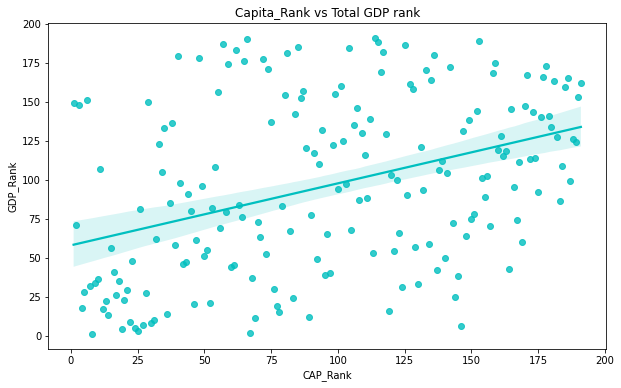

In [37]:
plt.figure(figsize =(10,6))
sns.regplot(data =total_capita, y = "GDP_Rank", x = "CAP_Rank", color = 'c').set(title = "Capita_Rank vs Total GDP rank")

In [38]:
top20GDP =total_capita.nlargest(20,["GDP"])

In [39]:
top80GDP =total_capita.nlargest(80,["GDP"])
top200GDP = total_capita.nlargest(200,["GDP"])

[Text(0.5, 1.0, 'Top20 Capita_Rank vs Total GDP rank')]

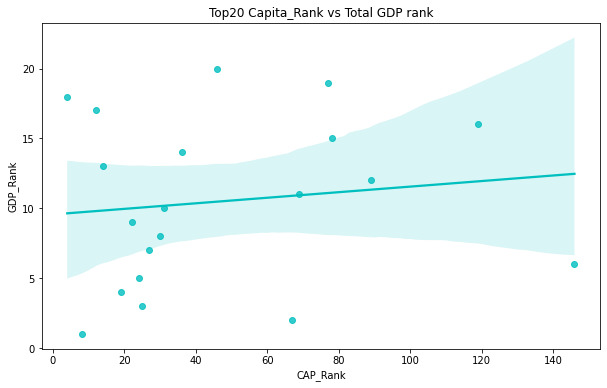

In [40]:
plt.figure(figsize =(10,6))
sns.regplot(data =top20GDP, y = "GDP_Rank", x = "CAP_Rank", color = 'c').set(title = "Top20 Capita_Rank vs Total GDP rank")

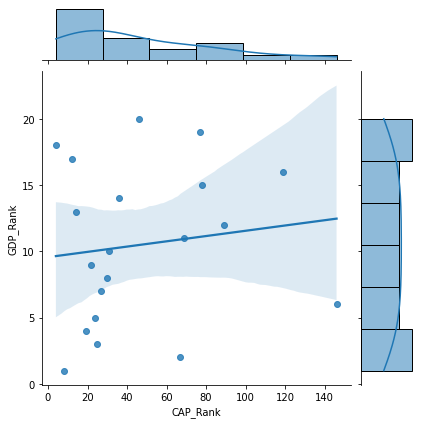

In [41]:
sns.jointplot(data =top20GDP, y = "GDP_Rank", x = "CAP_Rank",kind ='reg')

[Text(0.5, 1.0, 'Top20 Capita_Rank vs Total GDP rank')]

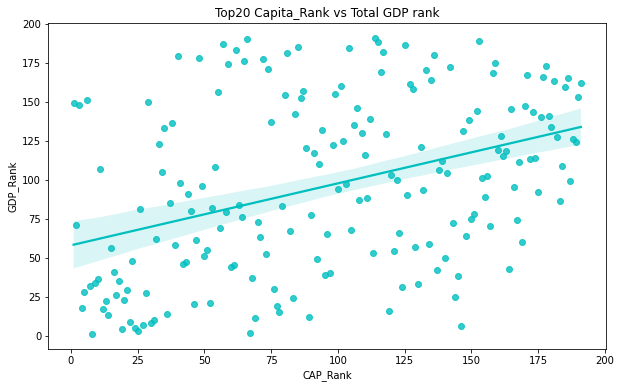

In [42]:
plt.figure(figsize =(10,6))
sns.regplot(data =top200GDP, y = "GDP_Rank", x = "CAP_Rank", color = 'c').set(title = "Top20 Capita_Rank vs Total GDP rank")

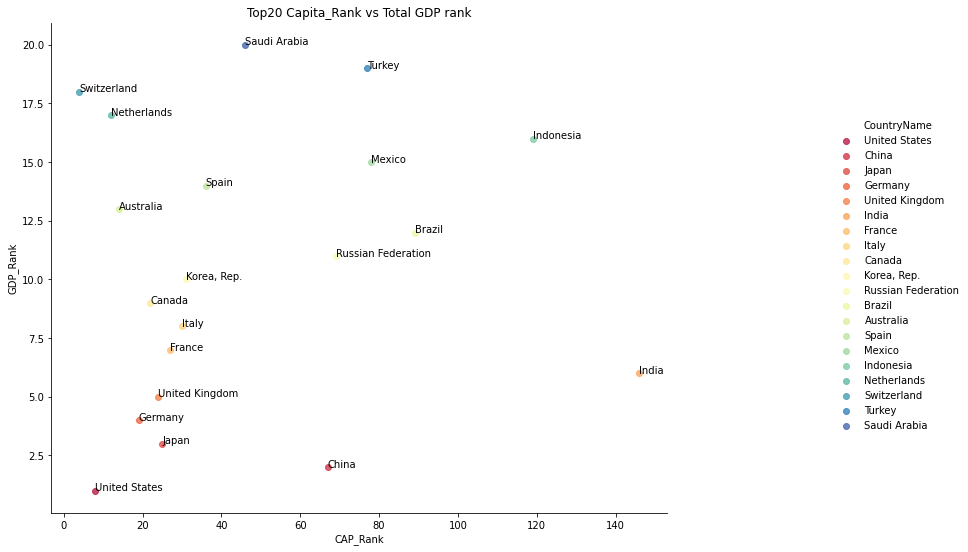

In [43]:

sns.lmplot(data =top20GDP, y= "GDP_Rank", x = "CAP_Rank", hue= 'CountryName',palette= 'Spectral').set(title = "Top20 Capita_Rank vs Total GDP rank")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(top20GDP["CAP_Rank"], top20GDP["GDP_Rank"], top20GDP["CountryName"], plt.gca()) 
plt.gcf().set_size_inches(15, 8)

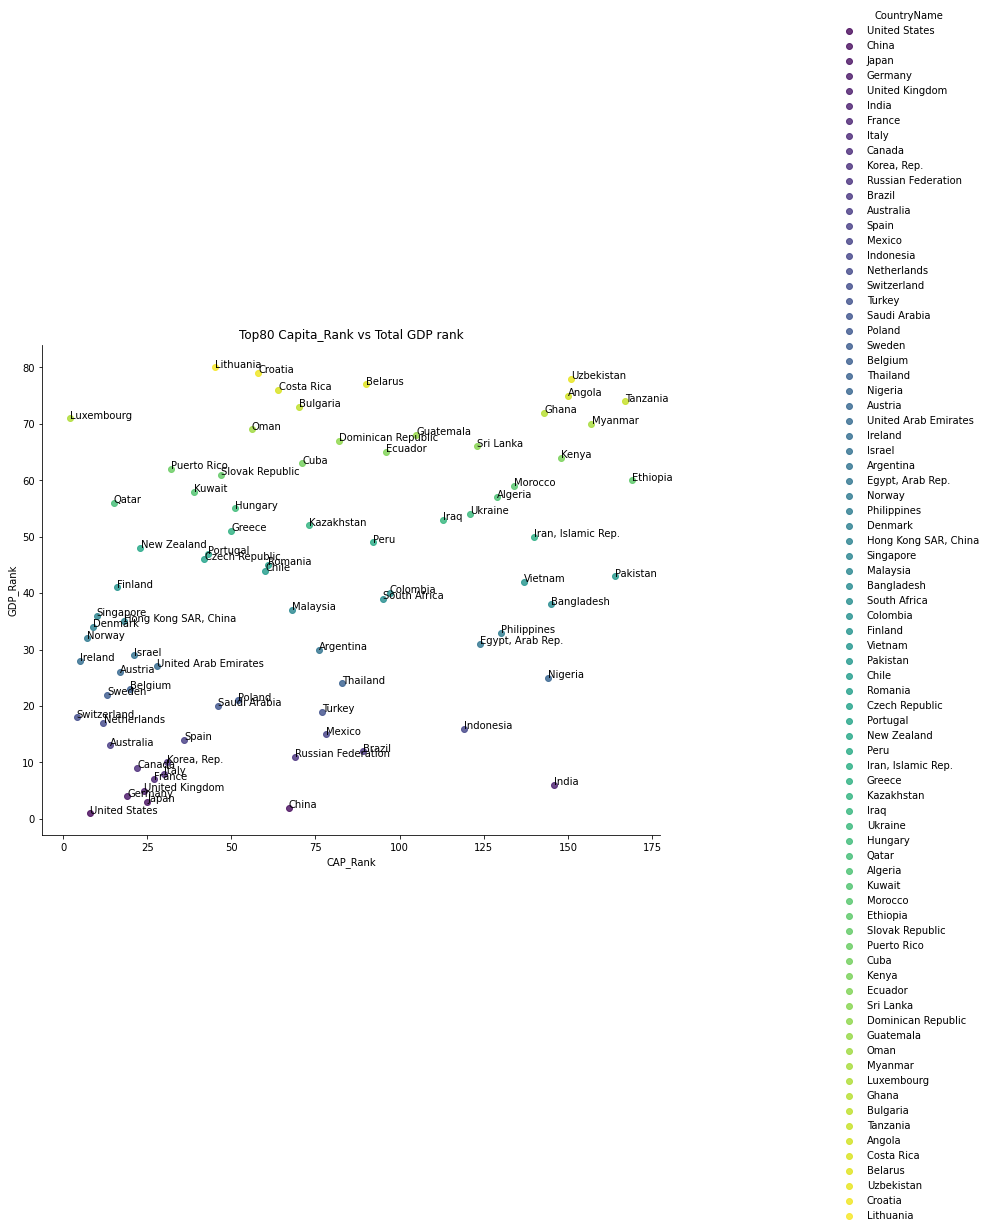

In [44]:

sns.lmplot(data =top80GDP, y= "GDP_Rank", x = "CAP_Rank", hue= 'CountryName',palette= 'viridis').set(title = "Top80 Capita_Rank vs Total GDP rank")

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(top80GDP["CAP_Rank"], top80GDP["GDP_Rank"], top80GDP["CountryName"], plt.gca()) 
plt.gcf().set_size_inches(15, 8)

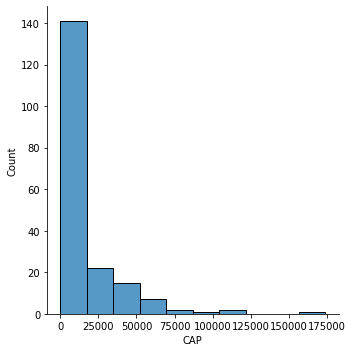

In [45]:
sns.displot(total_capita['CAP'], bins = 10)

Sampling data for plots 

[Text(0.5, 1.0, 'GDP per Capita vs Total GDP')]

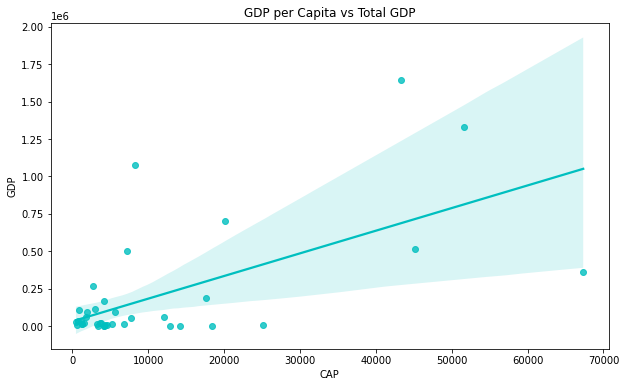

In [47]:
sampling = total_capita.sample(int(0.2*len(total_capita)))
                               
plt.figure(figsize =(10,6))
sns.regplot(data =sampling, y = "GDP", x = "CAP", color = 'c').set(title = "GDP per Capita vs Total GDP")

Plotting Billionaires networth and age 

<AxesSubplot:xlabel='age', ylabel='networth'>

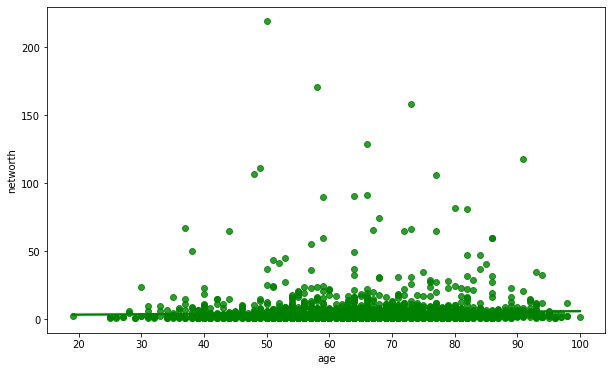

In [51]:
plt.figure(figsize = (10,6))
sns.regplot(data =Bnaires, y = "networth", x = "age", color ='g')

Merging total capita and billionaires data

In [52]:
Bnaires_GDP =Bnaires.merge(total_capita,how= "inner", left_on = "country", right_on="Country")

In [112]:
countrygroup = Bnaires_GDP.groupby('country').sum()

In [113]:
countrygroup.head()

,rank,networth,age,GDP,CAP,GDP_Rank,CAP_Rank,TotalGDP_standardliving_ratio
country,,,,,,,,
Algeria,536,5.10,78,145163.90,3306.86,57.00,129.00,0.44
Argentina,8589,14.00,486,2298401.87,51474.11,180.00,456.00,2.37
Australia,53532,205.10,2842,58559640.70,2273933.93,572.00,616.00,40.86
Austria,12041,61.70,754,4718619.38,534475.25,286.00,187.00,16.82
Barbados,1729,1.70,34,4365.50,15373.85,156.00,55.00,2.84


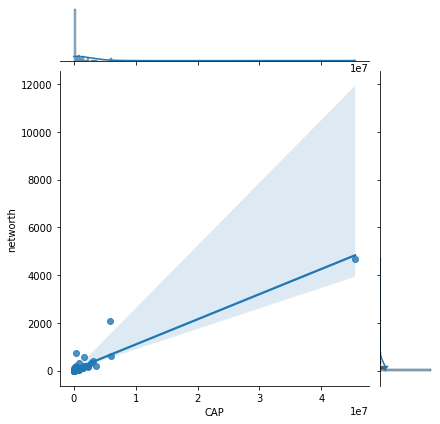

In [114]:
sns.jointplot(x= 'CAP', y = 'networth', data= countrygroup, kind='reg')

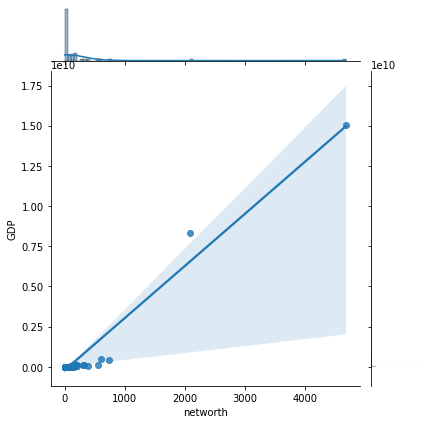

In [115]:
sns.jointplot(x= 'networth', y = 'GDP', data= countrygroup, kind='reg')

Below plot against networth and total gdp/gdp_cap ratio does not provide good insights. 

[Text(0.5, 1.0, 'GDP per Capita vs Total GDP')]

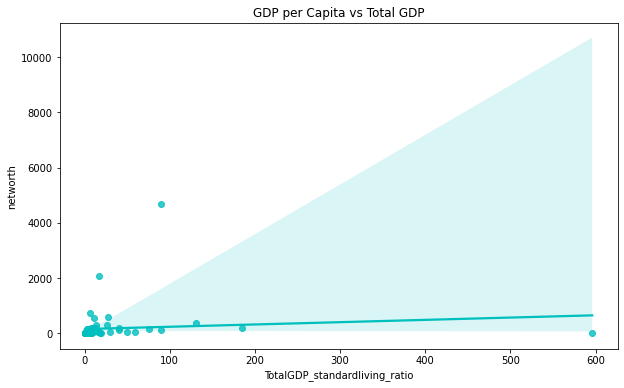

In [116]:
plt.figure(figsize =(10,6))
sns.regplot(data = countrygroup, y = "networth", x = "TotalGDP_standardliving_ratio", color = 'c').set(title = "GDP per Capita vs Total GDP")

ranking the data by gdp/gdp_cap to see if this provides a better information on billionaire countries and Gdp/gdp_cap gap

In [117]:
countrygroup["gdp_gdpcap_gap_rank"] = countrygroup["TotalGDP_standardliving_ratio"].rank(ascending = True)
countrygroup["networth_rank"] = countrygroup["networth"].rank(ascending = False)

In [124]:
countrygroup.sort_values(by = "gdp_gdpcap_gap_rank", ascending= False)

,country,rank,networth,age,GDP,CAP,GDP_Rank,CAP_Rank,TotalGDP_standardliving_ratio,gdp_gdpcap_gap_rank,networth_rank
39,Monaco,5824,15.10,314,29694.84,694752.76,596.00,4.00,596.00,71.00,42.00
60,Switzerland,41859,181.90,2706,30666714.08,3571117.01,738.00,164.00,184.50,70.00,13.00
24,"Hong Kong SAR, China",73072,383.40,4357,23221254.06,3103698.85,2345.00,1206.00,130.28,69.00,6.00
54,Singapore,30486,105.70,1670,8499961.95,1494943.80,900.00,250.00,90.00,68.00,21.00
67,United States,787670,4685.10,47833,15053415400.00,45445488.65,719.00,5752.00,89.88,67.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
70,Zimbabwe,1012,3.00,61,16768.51,1214.51,115.00,162.00,0.71,5.00,62.00
41,Nepal,1929,1.50,66,33657.18,1155.14,95.00,166.00,0.57,4.00,69.00
44,Nigeria,804,28.20,193,1296881.33,6291.28,75.00,432.00,0.52,3.00,33.00
61,Tanzania,1929,1.50,46,62409.75,1076.47,74.00,167.00,0.44,2.00,69.00


In [119]:
countrygroup.reset_index(inplace = True)

Below line graph on gdp_capita_gap_rank vs networth_rank has negative relationship, which indicates the countries that have most money by bilionaires will have higher proportion of gdp/gdpcapita 

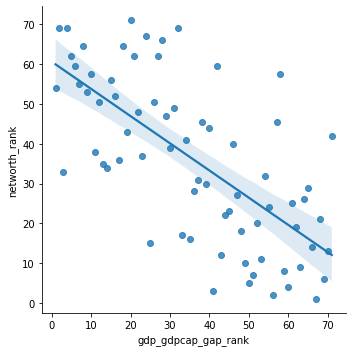

In [121]:
sns.lmplot(data =countrygroup, y = "networth_rank", x ='gdp_gdpcap_gap_rank' )

In [122]:
top30networth= countrygroup.nlargest(30,["networth"])

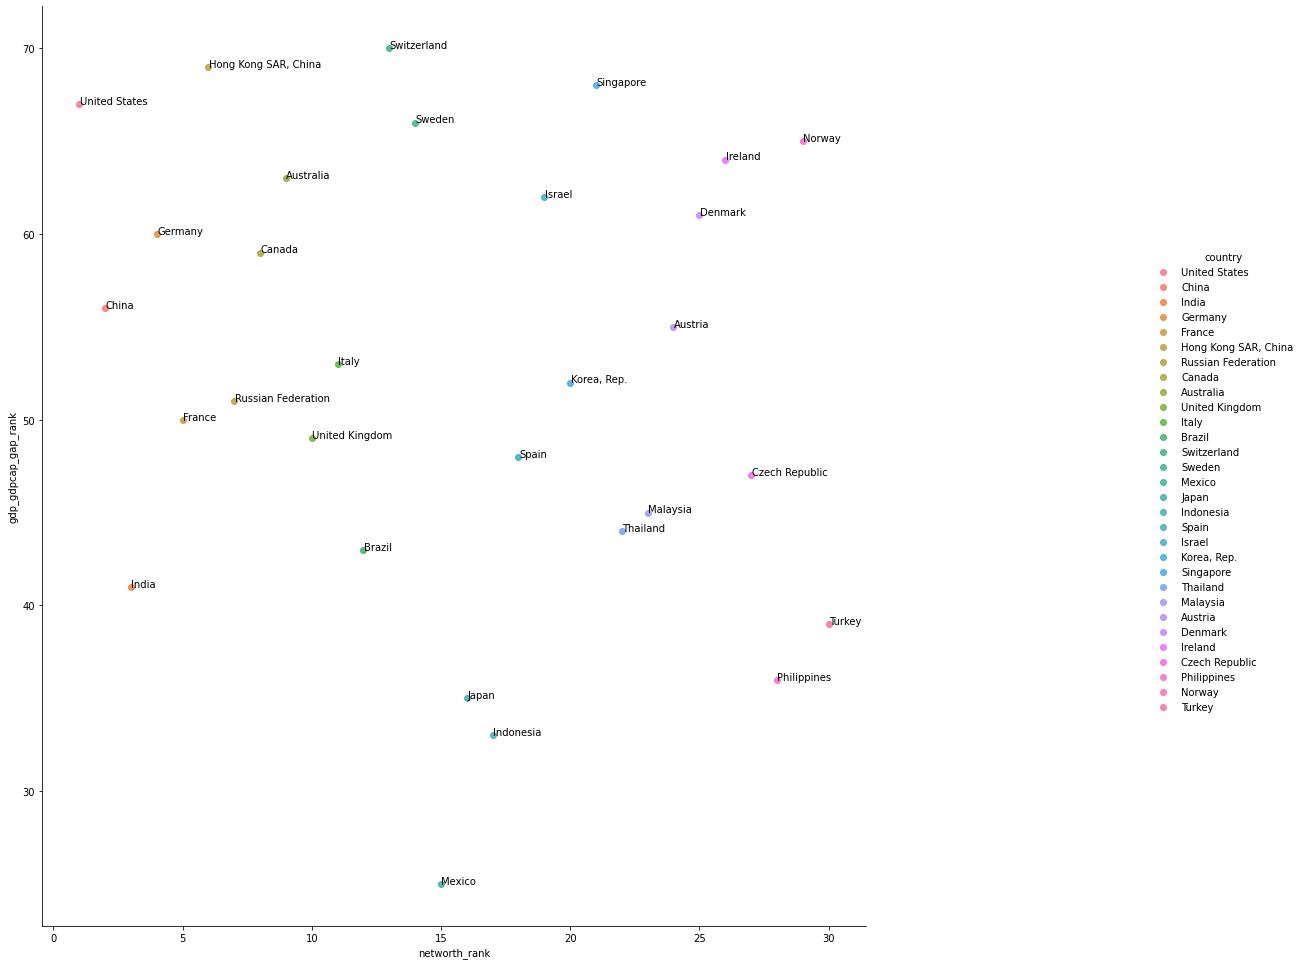

In [123]:
sns.lmplot(data =top30networth, x = "networth_rank", y ='gdp_gdpcap_gap_rank', hue = 'country')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(top30networth["networth_rank"], top30networth["gdp_gdpcap_gap_rank"], top30networth["country"], plt.gca()) 
plt.gcf().set_size_inches(20, 15)

